Import all dependencies and libraries

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import codecs, json
import tempfile
import requests
import base64

from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
file_path = "/content/drive/My Drive/Research/Premier League Deep Learning/results.csv"

my_df = pd.read_csv(file_path, encoding= 'unicode_escape')

print('The shape of the dataset is:', my_df.shape)

my_df.head()

The shape of the dataset is: (3040, 23)


,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,2013-14,2013-08-17T00:00:00Z,Arsenal,Aston Villa,1,3,A,1,1,D,A Taylor,16,9,4,4,4,3,15,18,4,5,1,0
1,2013-14,2013-08-17T00:00:00Z,Liverpool,Stoke,1,0,H,1,0,H,M Atkinson,26,10,11,4,12,6,11,11,1,1,0,0
2,2013-14,2013-08-17T00:00:00Z,Norwich,Everton,2,2,D,0,0,D,M Oliver,8,19,2,6,6,8,13,10,2,0,0,0
3,2013-14,2013-08-17T00:00:00Z,Sunderland,Fulham,0,1,A,0,0,D,N Swarbrick,20,5,3,1,6,1,14,14,0,3,0,0
4,2013-14,2013-08-17T00:00:00Z,Swansea,Man United,1,4,A,0,2,A,P Dowd,17,15,6,7,7,4,13,10,1,3,0,0


In [ ]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Season    3040 non-null   object
 1   DateTime  3040 non-null   object
 2   HomeTeam  3040 non-null   object
 3   AwayTeam  3040 non-null   object
 4   FTHG      3040 non-null   int64 
 5   FTAG      3040 non-null   int64 
 6   FTR       3040 non-null   object
 7   HTHG      3040 non-null   int64 
 8   HTAG      3040 non-null   int64 
 9   HTR       3040 non-null   object
 10  Referee   3040 non-null   object
 11  HS        3040 non-null   int64 
 12  AS        3040 non-null   int64 
 13  HST       3040 non-null   int64 
 14  AST       3040 non-null   int64 
 15  HC        3040 non-null   int64 
 16  AC        3040 non-null   int64 
 17  HF        3040 non-null   int64 
 18  AF        3040 non-null   int64 
 19  HY        3040 non-null   int64 
 20  AY        3040 non-null   int64 
 21  HR        3040

Text(0, 0.5, 'Frequency')

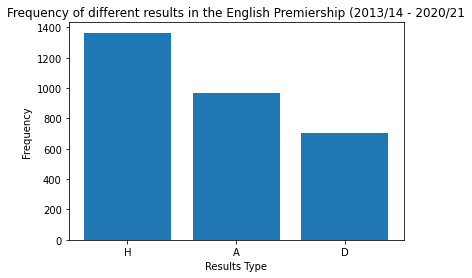

In [ ]:
fig, chart = plt.subplots()
data = my_df['FTR'].value_counts()

points = data.index
frequency = data.values

chart.bar(points, frequency)

chart.set_title('Frequency of different results in the English Premiership (2013/14 - 2020/21')
chart.set_xlabel('Results Type')
chart.set_ylabel('Frequency')

<BarContainer object of 31 artists>

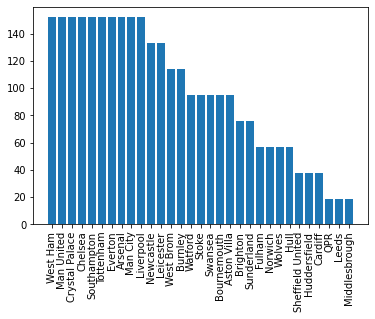

In [ ]:
fig, chart = plt.subplots()
teamdata = my_df['HomeTeam'].value_counts()
plt.xticks(rotation=90)

chart.bar(teamdata.index, teamdata.values)


In [ ]:
print("For row 149 the teams playing are " + str(my_df["HomeTeam"][149]) + " and " + str(my_df["AwayTeam"][149]) + " and the label is "  + str(my_df["FTR"][149]) + " and the day is " + str(my_df["DateTime"][149]))

For row 149 the teams playing are Swansea and Hull and the label is D and the day is 2013-12-09T00:00:00Z


In [ ]:
epl_df_objects =my_df.copy()
epl_df_objects.drop('Referee', axis=1, inplace=True)
epl_df_objects.drop('Season', axis=1, inplace=True)

epl_df_objects.head()

,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,2013-08-17T00:00:00Z,Arsenal,Aston Villa,1,3,A,1,1,D,16,9,4,4,4,3,15,18,4,5,1,0
1,2013-08-17T00:00:00Z,Liverpool,Stoke,1,0,H,1,0,H,26,10,11,4,12,6,11,11,1,1,0,0
2,2013-08-17T00:00:00Z,Norwich,Everton,2,2,D,0,0,D,8,19,2,6,6,8,13,10,2,0,0,0
3,2013-08-17T00:00:00Z,Sunderland,Fulham,0,1,A,0,0,D,20,5,3,1,6,1,14,14,0,3,0,0
4,2013-08-17T00:00:00Z,Swansea,Man United,1,4,A,0,2,A,17,15,6,7,7,4,13,10,1,3,0,0


In [ ]:
print(epl_df_objects.isnull().values.sum())

0


In [ ]:

epl_df_objects["matchDate"] = pd.to_datetime(epl_df_objects["DateTime"], infer_datetime_format=True)
epl_df_objects['matchDay'] = epl_df_objects['matchDate'].dt.day_name()

print(epl_df_objects["matchDate"][149])
print(epl_df_objects["matchDay"][149])

epl_df_objects.drop('DateTime', axis=1, inplace=True)
epl_df_objects.drop('matchDate', axis=1, inplace=True)
epl_df_objects.head()

2013-12-09 00:00:00
Monday


,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,matchDay
0,Arsenal,Aston Villa,1,3,A,1,1,D,16,9,4,4,4,3,15,18,4,5,1,0,Saturday
1,Liverpool,Stoke,1,0,H,1,0,H,26,10,11,4,12,6,11,11,1,1,0,0,Saturday
2,Norwich,Everton,2,2,D,0,0,D,8,19,2,6,6,8,13,10,2,0,0,0,Saturday
3,Sunderland,Fulham,0,1,A,0,0,D,20,5,3,1,6,1,14,14,0,3,0,0,Saturday
4,Swansea,Man United,1,4,A,0,2,A,17,15,6,7,7,4,13,10,1,3,0,0,Saturday


In [ ]:
epl_df_objects = pd.get_dummies(epl_df_objects, columns=["HomeTeam"], prefix=["HomeTeam"])
epl_df_objects = pd.get_dummies(epl_df_objects, columns=['AwayTeam'], prefix=['AwayTeam'])
epl_df_objects = pd.get_dummies(epl_df_objects, columns=['HTR'], prefix=['HTR'])
epl_df_objects = pd.get_dummies(epl_df_objects, columns=['matchDay'], prefix=['matchDay'])

epl_df_objects.head()

,FTHG,FTAG,FTR,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,HomeTeam_Arsenal,HomeTeam_Aston Villa,HomeTeam_Bournemouth,HomeTeam_Brighton,HomeTeam_Burnley,HomeTeam_Cardiff,HomeTeam_Chelsea,HomeTeam_Crystal Palace,HomeTeam_Everton,HomeTeam_Fulham,HomeTeam_Huddersfield,HomeTeam_Hull,HomeTeam_Leeds,HomeTeam_Leicester,HomeTeam_Liverpool,HomeTeam_Man City,HomeTeam_Man United,HomeTeam_Middlesbrough,HomeTeam_Newcastle,HomeTeam_Norwich,HomeTeam_QPR,HomeTeam_Sheffield United,HomeTeam_Southampton,...,AwayTeam_Aston Villa,AwayTeam_Bournemouth,AwayTeam_Brighton,AwayTeam_Burnley,AwayTeam_Cardiff,AwayTeam_Chelsea,AwayTeam_Crystal Palace,AwayTeam_Everton,AwayTeam_Fulham,AwayTeam_Huddersfield,AwayTeam_Hull,AwayTeam_Leeds,AwayTeam_Leicester,AwayTeam_Liverpool,AwayTeam_Man City,AwayTeam_Man United,AwayTeam_Middlesbrough,AwayTeam_Newcastle,AwayTeam_Norwich,AwayTeam_QPR,AwayTeam_Sheffield United,AwayTeam_Southampton,AwayTeam_Stoke,AwayTeam_Sunderland,AwayTeam_Swansea,AwayTeam_Tottenham,AwayTeam_Watford,AwayTeam_West Brom,AwayTeam_West Ham,AwayTeam_Wolves,HTR_A,HTR_D,HTR_H,matchDay_Friday,matchDay_Monday,matchDay_Saturday,matchDay_Sunday,matchDay_Thursday,matchDay_Tuesday,matchDay_Wednesday
0,1,3,A,1,1,16,9,4,4,4,3,15,18,4,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,1,0,H,1,0,26,10,11,4,12,6,11,11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,2,2,D,0,0,8,19,2,6,6,8,13,10,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0,1,A,0,0,20,5,3,1,6,1,14,14,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,1,4,A,0,2,17,15,6,7,7,4,13,10,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [ ]:

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

epl_df_objects['FTR']= label_encoder.fit_transform(epl_df_objects['FTR'])

#print objects to test
print('Unique values for our label are: ', epl_df_objects['FTR'].unique())
print('if the home team wins the label is ', epl_df_objects['FTR'][1])
print('if the away team wins the label is ', epl_df_objects['FTR'][0])
print('if there is a tie the label is ', epl_df_objects['FTR'][2])
label = epl_df_objects['FTR']
print('the result for the match in row 149 is ', label[149])
print(epl_df_objects.iloc[:,3:90])
features = epl_df_objects.iloc[:,3:90]


Unique values for our label are:  [0 2 1]
if the home team wins the label is  2
if the away team wins the label is  0
if there is a tie the label is  1
the result for the match in row 149 is  1
      HTHG  HTAG  HS  ...  matchDay_Thursday  matchDay_Tuesday  matchDay_Wednesday
0        1     1  16  ...                  0                 0                   0
1        1     0  26  ...                  0                 0                   0
2        0     0   8  ...                  0                 0                   0
3        0     0  20  ...                  0                 0                   0
4        0     2  17  ...                  0                 0                   0
...    ...   ...  ..  ...                ...               ...                 ...
3035     1     0  19  ...                  0                 0                   0
3036     2     0  21  ...                  0                 0                   0
3037     1     0  12  ...                  0               

In [ ]:
from sklearn.model_selection import train_test_split
y=np.ravel(label)

X = features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=False)

print("The shape of X_train is " + str(X_train.shape))
print("The size of y_train is " + str(y_train.shape))
print("The size of X_test set is " + str(X_test.shape))
print("The size of y_test is " + str(y_test.shape))

The shape of X_train is (2036, 86)
The size of y_train is (2036,)
The size of X_test set is (1004, 86)
The size of y_test is (1004,)


In [ ]:
#one hot-encoded y_train and y_test
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

print("The size of y_train is" + str(y_train.shape))
print("The size of y_test is" + str(y_test.shape))

print(y_train[0])

The size of y_train is(2036, 3)
The size of y_test is(1004, 3)
[1. 0. 0.]


In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(258, input_dim=86, activation='relu'),
                                    tf.keras.layers.Dense(10, input_dim=258, activation='relu'),
                                    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 258)               22446     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2590      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 25,069
Trainable params: 25,069
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=40)

Epoch 1/40
64/64 [==============================] - 3s 2ms/step - loss: 0.9535 - accuracy: 0.5540
Epoch 2/40
64/64 [==============================] - 0s 2ms/step - loss: 0.7793 - accuracy: 0.6498
Epoch 3/40
64/64 [==============================] - 0s 2ms/step - loss: 0.7309 - accuracy: 0.6690
Epoch 4/40
64/64 [==============================] - 0s 2ms/step - loss: 0.7143 - accuracy: 0.6704
Epoch 5/40
64/64 [==============================] - 0s 2ms/step - loss: 0.7005 - accuracy: 0.6861
Epoch 6/40
64/64 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.6807
Epoch 7/40
64/64 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.6965
Epoch 8/40
64/64 [==============================] - 0s 2ms/step - loss: 0.6676 - accuracy: 0.6984
Epoch 9/40
64/64 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.6979
Epoch 10/40
64/64 [==============================] - 0s 2ms/step - loss: 0.6656 - accuracy: 0.6916
Epoch 11/40
64/64 [

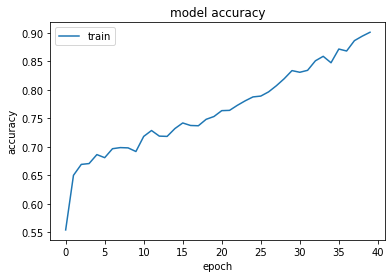

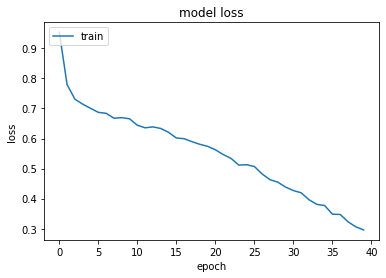

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy", score[1])

32/32 [==============================] - 0s 2ms/step - loss: 1.0629 - accuracy: 0.6394
Test Score: 1.0628819465637207
Test Accuracy 0.6394422054290771
